<a href="https://colab.research.google.com/github/harikrishna0007/Hari_Data690/blob/main/FDS/assignment_1(Hari).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-1

Due on September, 27.


This exercise will require you to pull some data from the `yahoo finance`. Yahoo finance is currently the one of most widely used API of financial market data.

Yahoo finance has a large number of data sources, but, you restrict your attention to the extraction of the stock price.

For this assignment, we will focus on Apple and Microsoft stock prices data from the S&P-500, a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States. You'll analyze these stock prices. These company are listed under the stock ticker `aapl` and `msft`.

These are your tasks for this mini project:

1. Collect daily closing price stock price of Apple and Microsoft covering the period of 2020-01-01 - 2021-01-01 (keep in mind that the date format is YYYY-MM-DD). (15 pts)
2. Draw the line plot for the stock prices and interpret the stock price movement, if there is any. (15 pts)
3. Calculate stock return of Apple and Microsoft in this period. (15 pts)
4. What is the largest return of these companies during this period? (15 pts)
5. Draw the histogram of the returns and interpret the distributions you obtained. (15 pts)
6. Use QQ plot and see if the stock returns follow normal distribution. (15 pts)
7. Calculate the correlation coefficient between these stock returns and interpret. (10 pts)



In [4]:
# answers here

# import libraries to visulize and analyse data

import numpy as np
import matplotlib.pyplot as plt #used for visalize the data
import seaborn as sns
from scipy.stats import norm
import math

In [5]:
# installing yahoo finance data using pip from yahoo.com
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [15]:
#Task 1
#importing yahoo data 
import yfinance as yfin

In [17]:
# Downloading Apple & Microsoft and spy data from yahoo finance between 2020 - 2021
data = yfin.download(tickers = "spy,aapl,msft", start="2020-01-01", end="2021-01-01", interval = "1d")
data.head()

[*********************100%***********************]  3 of 3 completed


Adj Close                              Close              \
                 AAPL        MSFT         SPY       AAPL        MSFT   
Date                                                                   
2020-01-02  73.683578  156.592010  311.117035  75.087502  160.619995   
2020-01-03  72.967224  154.642166  308.761169  74.357498  158.619995   
2020-01-06  73.548630  155.041885  309.939056  74.949997  159.029999   
2020-01-07  73.202728  153.628250  309.067657  74.597504  157.580002   
2020-01-08  74.380287  156.075317  310.714813  75.797501  160.089996   

                             High                                Low  \
                   SPY       AAPL        MSFT         SPY       AAPL   
Date                                                                   
2020-01-02  324.869995  75.150002  160.729996  324.890015  73.797501   
2020-01-03  322.410004  75.144997  159.949997  323.640015  74.125000   
2020-01-06  323.640015  74.989998  159.100006  323.730011  73.187500   
2020-01-07  322.730011  75.224998  159.669998  323.540009  74.370003   
2020-01-08  324.450012  76.110001  160.800003  325.779999  74.290001   

                                         Open                          \
                  MSFT         SPY       AAPL        MSFT         SPY   
Date                                                                    
2020-01-02  158.330002  322.529999  74.059998  158.779999  323.540009   
2020-01-03  158.059998  321.100006  74.287498  158.320007  321.160004   
2020-01-06  156.509995  320.359985  73.447502  157.080002  320.489990   
2020-01-07  157.320007  322.239990  74.959999  159.320007  323.019989   
2020-01-08  157.949997  322.670013  74.290001  158.929993  322.940002   

               Volume                      
                 AAPL      MSFT       SPY  
Date                                       
2020-01-02  135480400  22622100  59151200  
2020-01-03  146322800  21116200  77709700  
2020-01-06  118387200  20813700  55653900  
2020-01-07  108872000  21634100  40496400  
2020-01-08  132079200  27746500  68296000

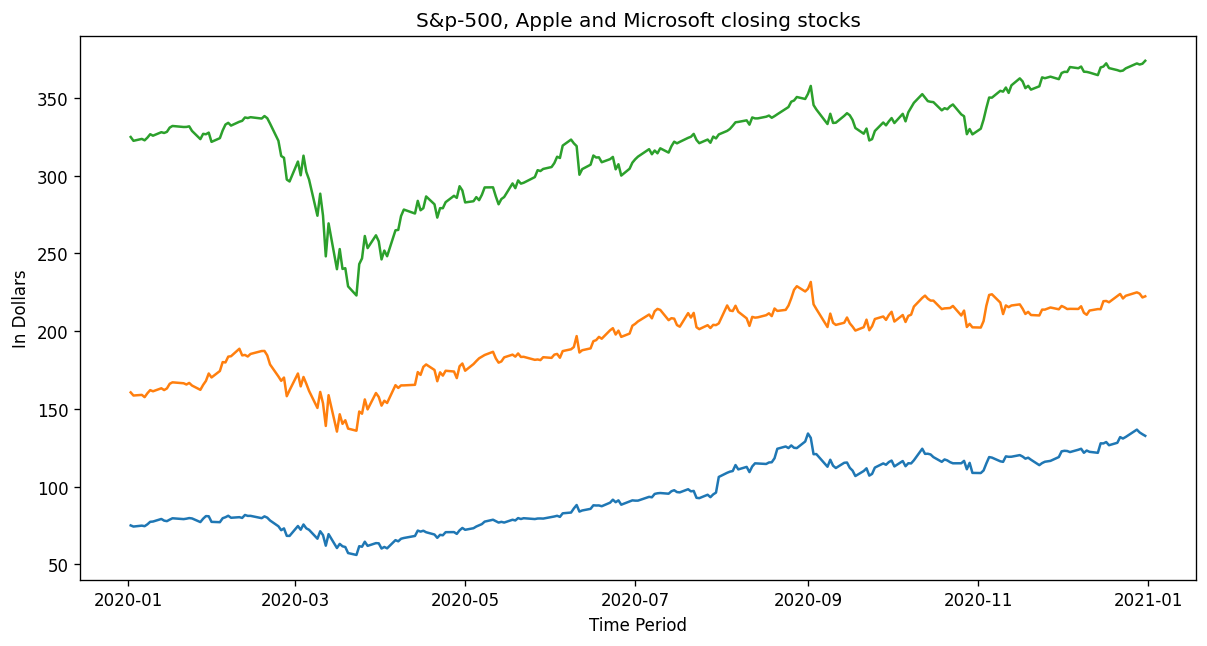

In [27]:
#Drawing the line plot for the stock prices and interpretation
#green color indicates s&p-500
#orange color graph indicates apple
#Blue color graph indicates microsoft
closestock = data.Close
plt.figure(figsize=(12,6), dpi = 120)
plt.title('S&p-500, Apple and Microsoft closing stocks')
plt.ylabel('In Dollars')
plt.xlabel('Time Period')
plt.plot(closestock)
plt.show()

#Interpretation
There is a sudden dropdown of stocks after 2020 March in all three Tickers and increased slowlely with little fluctuations.

In [43]:
#Calculate stock return of Apple and Microsoft in this period.

stock_return = np.log(closestock) - np.log(closestock.shift(1))
stock_return1 = stock_return.drop(['SPY'], axis=1) #dropping spy column
stock_return1

,AAPL,MSFT
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.009770,-0.012530
2020-01-06,0.007937,0.002581
2020-01-07,-0.004714,-0.009160
2020-01-08,0.015958,0.015803
...,...,...
2020-12-24,0.007683,0.007797
2020-12-28,0.035141,0.009873
2020-12-29,-0.013404,-0.003607


In [51]:
#Calculating largest return of these companies during this period
A = stock_return1.max()
print("Maximum Retun for the two companies between this period -",A)

Maximum Retun for the two companies between this period - AAPL    0.113157
MSFT    0.132929
dtype: float64


In [97]:
#plotting histogram
# Downloading data of Apple for 1 year from 2020 to 2021
Aapldata = yfin.download(tickers = "aapl", start="2020-01-01", end="2021-01-01", interval = "1d")
Aapldata.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.683571,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.967209,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.548630,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.202721,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.380295,132079200


In [98]:
# Downloading data of microsoft for 1 year from 2020 to 2021
Msftdata = yfin.download(tickers = "msft", start="2020-01-01", end="2021-01-01", interval = "1d")
Msftdata.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,158.779999,160.729996,158.330002,160.619995,156.592010,22622100
2020-01-03,158.320007,159.949997,158.059998,158.619995,154.642151,21116200
2020-01-06,157.080002,159.100006,156.509995,159.029999,155.041901,20813700
2020-01-07,159.320007,159.669998,157.320007,157.580002,153.628250,21634100
2020-01-08,158.929993,160.800003,157.949997,160.089996,156.075302,27746500


In [99]:
#Closing stock of aaple by day
close = Aapldata.Close
close

Date
2020-01-02     75.087502
2020-01-03     74.357498
2020-01-06     74.949997
2020-01-07     74.597504
2020-01-08     75.797501
                 ...    
2020-12-24    131.970001
2020-12-28    136.690002
2020-12-29    134.869995
2020-12-30    133.720001
2020-12-31    132.690002
Name: Close, Length: 253, dtype: float64

In [100]:
#stock retun of Apple
stock_return1 = np.log(close) - np.log(close.shift(1))
stock_return1

Date
2020-01-02         NaN
2020-01-03   -0.009770
2020-01-06    0.007937
2020-01-07   -0.004714
2020-01-08    0.015958
                ...   
2020-12-24    0.007683
2020-12-28    0.035141
2020-12-29   -0.013404
2020-12-30   -0.008563
2020-12-31   -0.007732
Name: Close, Length: 253, dtype: float64

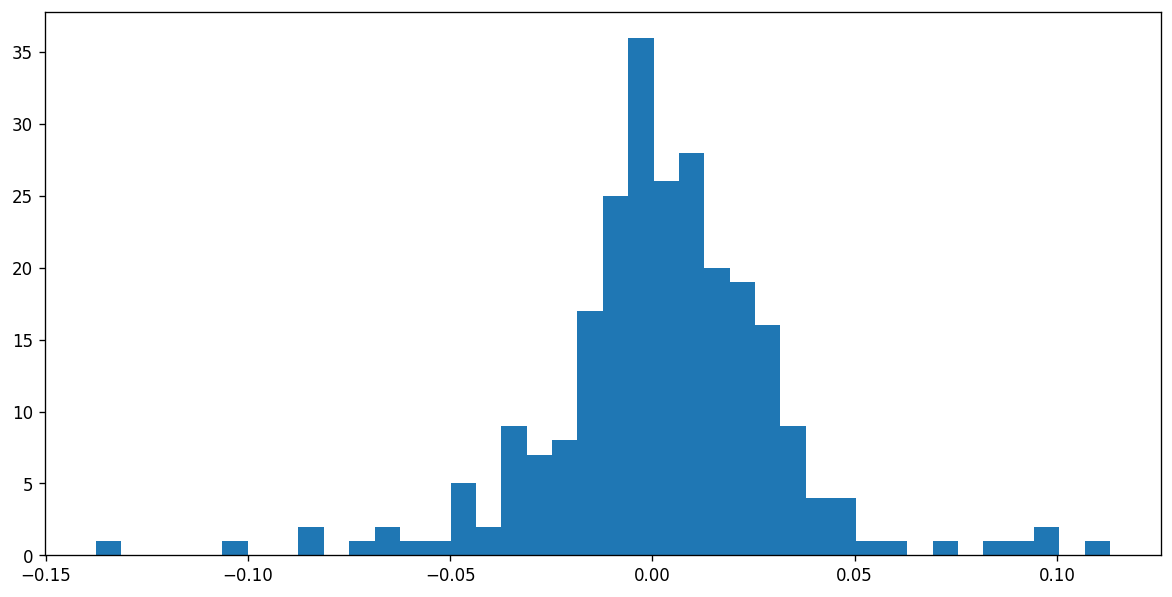

In [106]:
#Histogram of Apple 
plt.figure(figsize=(12,6), dpi = 120)
plt.hist(stock_return1, bins = 40)
plt.show()

In [102]:
close1 = Msftdata.Close
close1

Date
2020-01-02    160.619995
2020-01-03    158.619995
2020-01-06    159.029999
2020-01-07    157.580002
2020-01-08    160.089996
                 ...    
2020-12-24    222.750000
2020-12-28    224.960007
2020-12-29    224.149994
2020-12-30    221.679993
2020-12-31    222.419998
Name: Close, Length: 253, dtype: float64

In [103]:
stock_return2 = np.log(close1) - np.log(close1.shift(1))
stock_return2

Date
2020-01-02         NaN
2020-01-03   -0.012530
2020-01-06    0.002581
2020-01-07   -0.009160
2020-01-08    0.015803
                ...   
2020-12-24    0.007797
2020-12-28    0.009873
2020-12-29   -0.003607
2020-12-30   -0.011081
2020-12-31    0.003333
Name: Close, Length: 253, dtype: float64

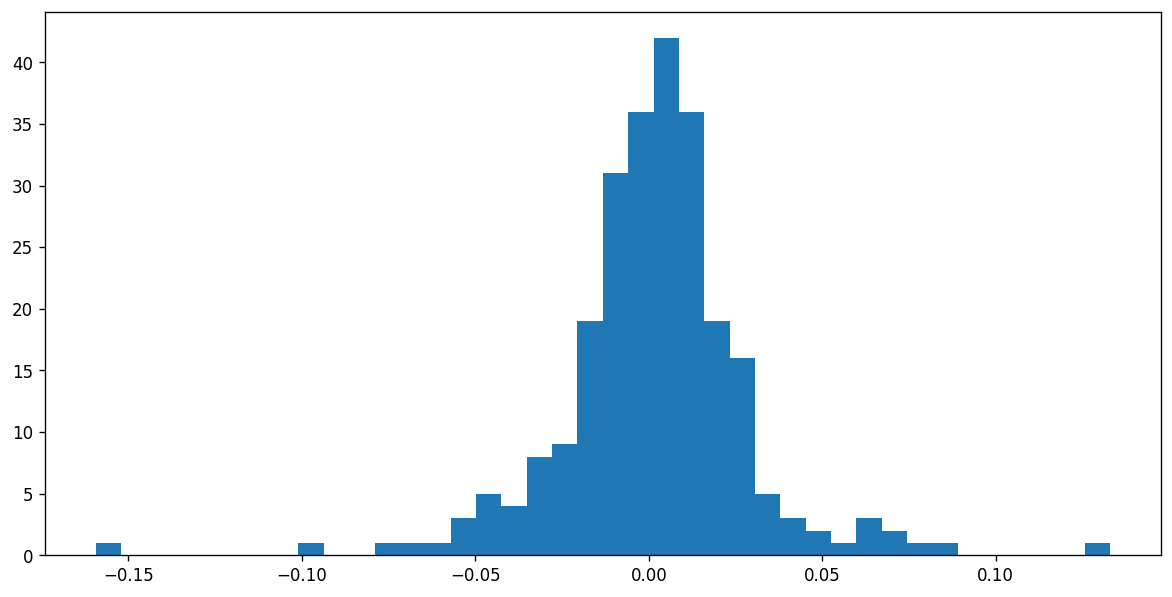

In [105]:
#Histogram of Microsoft
plt.figure(figsize=(12,6), dpi = 120)
plt.hist(stock_return2, bins = 40)
plt.show()

#Interpretation
Both follows normal distribution 

In [114]:
#Use QQ plot and see if the stock returns follow normal distribution
from scipy import stats
print(stats.describe(stock_return1[1]))
print(stats.describe(stock_return2[1]))

DescribeResult(nobs=1, minmax=(-0.0097696030604979, -0.0097696030604979), mean=-0.0097696030604979, variance=nan, skewness=0.0, kurtosis=-3.0)
DescribeResult(nobs=1, minmax=(-0.01252992248844631, -0.01252992248844631), mean=-0.01252992248844631, variance=nan, skewness=0.0, kurtosis=-3.0)


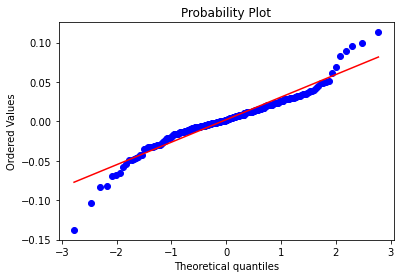

In [118]:
stats.probplot(stock_return1[1:], plot=plt);

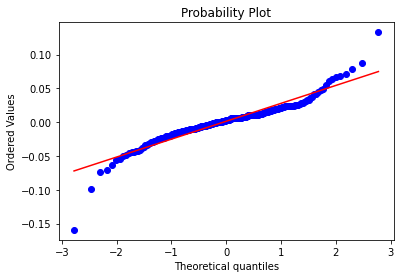

In [119]:
stats.probplot(stock_return2[1:], plot=plt);

#Interpretation

Both are almost equal and follows same line which means it follows normal distribution

In [123]:
#Calculating the correlation coefficient between these stock returns and interpret
print("The Correlation between stock return and close price: ",stock_return1.corr(close)) #apple close price and return corelation
print("The Correlation between stock return and close price: ",stock_return2.corr(close1)) #microsoft close price and return corelation

The Correlation between stock return and close price:  0.0782191232587448
The Correlation between stock return and close price:  0.09643072127376122
